### Flight Delay Prediction

### Data Dictionary
- YEAR: The year of the flight (e.g., 2015).
- MONTH: The month of the flight (1 to 12).
- DAY: The day of the month of the flight (1 to 31).
- DAY_OF_WEEK: The day of the week, represented numerically (1 = Sunday, 2 = Monday, ..., 7 = Saturday).
- AIRLINE: The code or abbreviation representing the airline of the flight.
- FLIGHT_NUMBER: The flight number assigned by the airline.
- TAIL_NUMBER: The unique aircraft tail number.
- ORIGIN_AIRPORT: The code or abbreviation for the airport of departure.
- DESTINATION_AIRPORT: The code or abbreviation for the destination airport.
- SCHEDULED_DEPARTURE: The scheduled departure time in local time (24-hour format).
- DEPARTURE_TIME: The actual departure time of the flight in local time (24-hour format).
- DEPARTURE_DELAY: The delay in departure time, in minutes (negative values indicate early departure).
- TAXI_OUT: The time taken, in minutes, for the aircraft to taxi from the gate to the runway.
- WHEELS_OFF: The time at which the aircraft's wheels leave the ground.
- SCHEDULED_TIME: The scheduled duration of the flight in minutes.
- ELAPSED_TIME: The actual elapsed time of the flight in minutes.
- AIR_TIME: The time the aircraft spends in the air, excluding taxi time.
- DISTANCE: The distance of the flight in miles.
- WHEELS_ON: The time at which the aircraft's wheels touch the ground upon arrival.
- TAXI_IN: The time taken, in minutes, for the aircraft to taxi from the runway to the gate upon arrival.
- SCHEDULED_ARRIVAL: The scheduled arrival time in local time (24-hour format).
- ARRIVAL_TIME: The actual arrival time of the flight in local time (24-hour format).
- ARRIVAL_DELAY: The delay in arrival time, in minutes (negative values indicate early arrival).
- DIVERTED: A binary indicator (0 or 1) specifying whether the flight was diverted.
- CANCELLED: A binary indicator (0 or 1) specifying whether the flight was canceled.

In [1]:
# General Libraries
import numpy as np 
import pandas as pd 

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

## Gather, Access, and Clean Data

In [2]:
pd.set_option('display.max_columns', None)

### Gather Data

In [3]:
df = pd.read_csv(r'..\Flight_Delay_Prediction\flights.csv')
df.head(3)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Assess Data

In [4]:
df.shape

(1048575, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

- Missing values in various columns

In [6]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
dtype: int64

- Missing values in various columns

In [7]:
len(df)

1048575

In [8]:
# Check percentages of missing values
round((df.isnull().mean() * 100), 2)
# (df.isnull().sum()/len(df)) * 100

YEAR                    0.00
MONTH                   0.00
DAY                     0.00
DAY_OF_WEEK             0.00
AIRLINE                 0.00
FLIGHT_NUMBER           0.00
TAIL_NUMBER             0.74
ORIGIN_AIRPORT          0.00
DESTINATION_AIRPORT     0.00
SCHEDULED_DEPARTURE     0.00
DEPARTURE_TIME          3.77
DEPARTURE_DELAY         3.77
TAXI_OUT                3.84
WHEELS_OFF              3.84
SCHEDULED_TIME          0.00
ELAPSED_TIME            4.11
AIR_TIME                4.11
DISTANCE                0.00
WHEELS_ON               3.94
TAXI_IN                 3.94
SCHEDULED_ARRIVAL       0.00
ARRIVAL_TIME            3.94
ARRIVAL_DELAY           4.11
DIVERTED                0.00
CANCELLED               0.00
CANCELLATION_REASON    96.14
AIR_SYSTEM_DELAY       78.21
SECURITY_DELAY         78.21
AIRLINE_DELAY          78.21
LATE_AIRCRAFT_DELAY    78.21
WEATHER_DELAY          78.21
dtype: float64

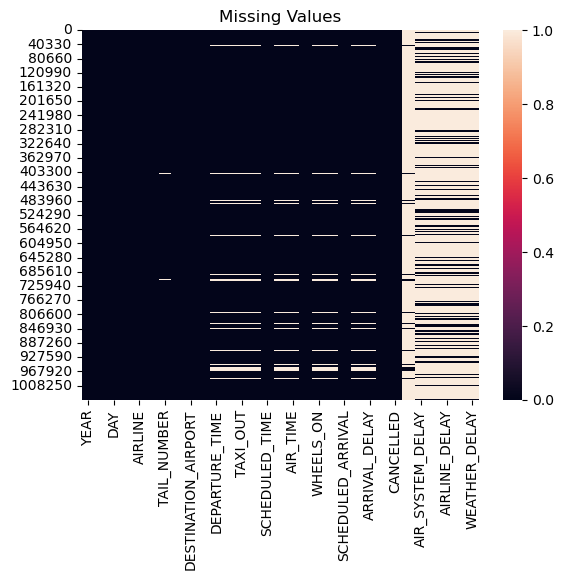

In [9]:
sns.heatmap(df.isnull())
plt.title("Missing Values")
plt.show()

<Axes: >

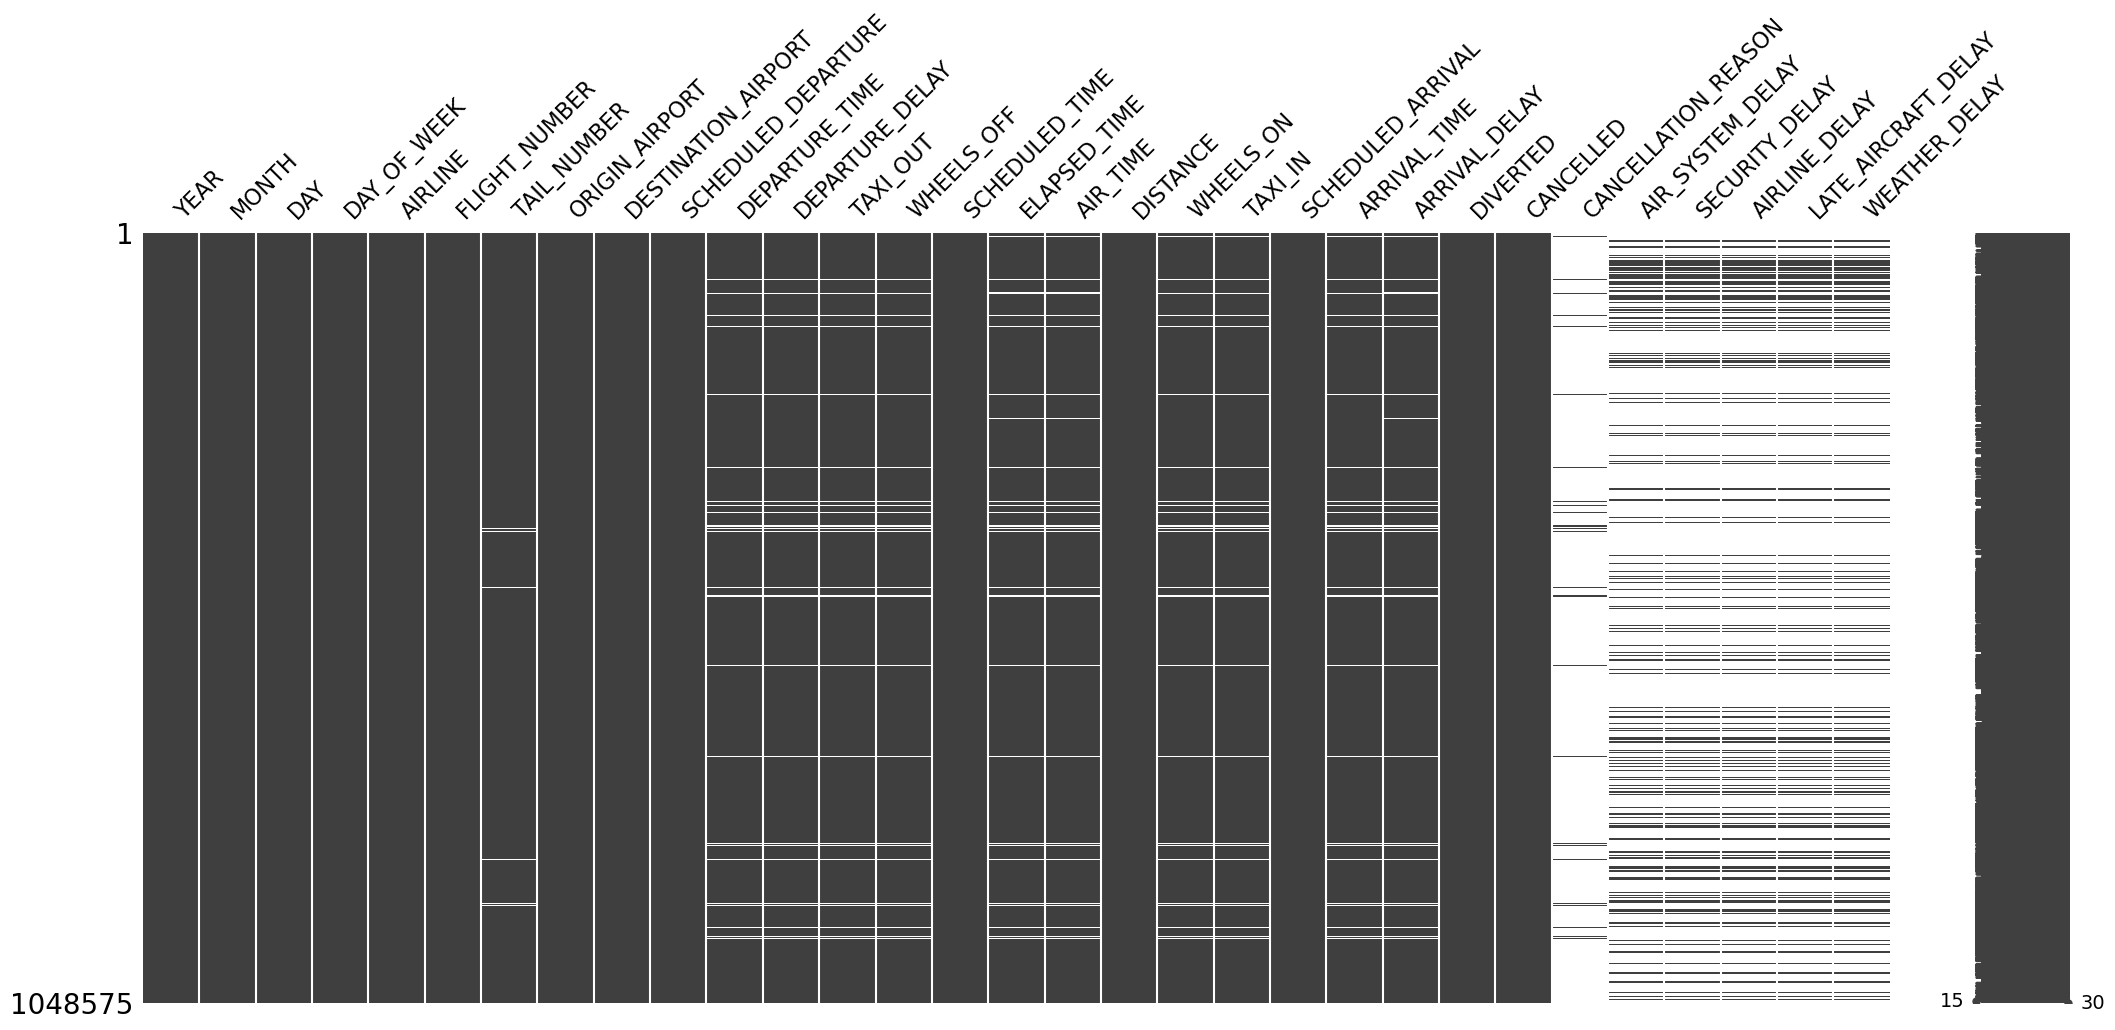

In [10]:
import missingno as msno
msno.matrix(df)

<Axes: >

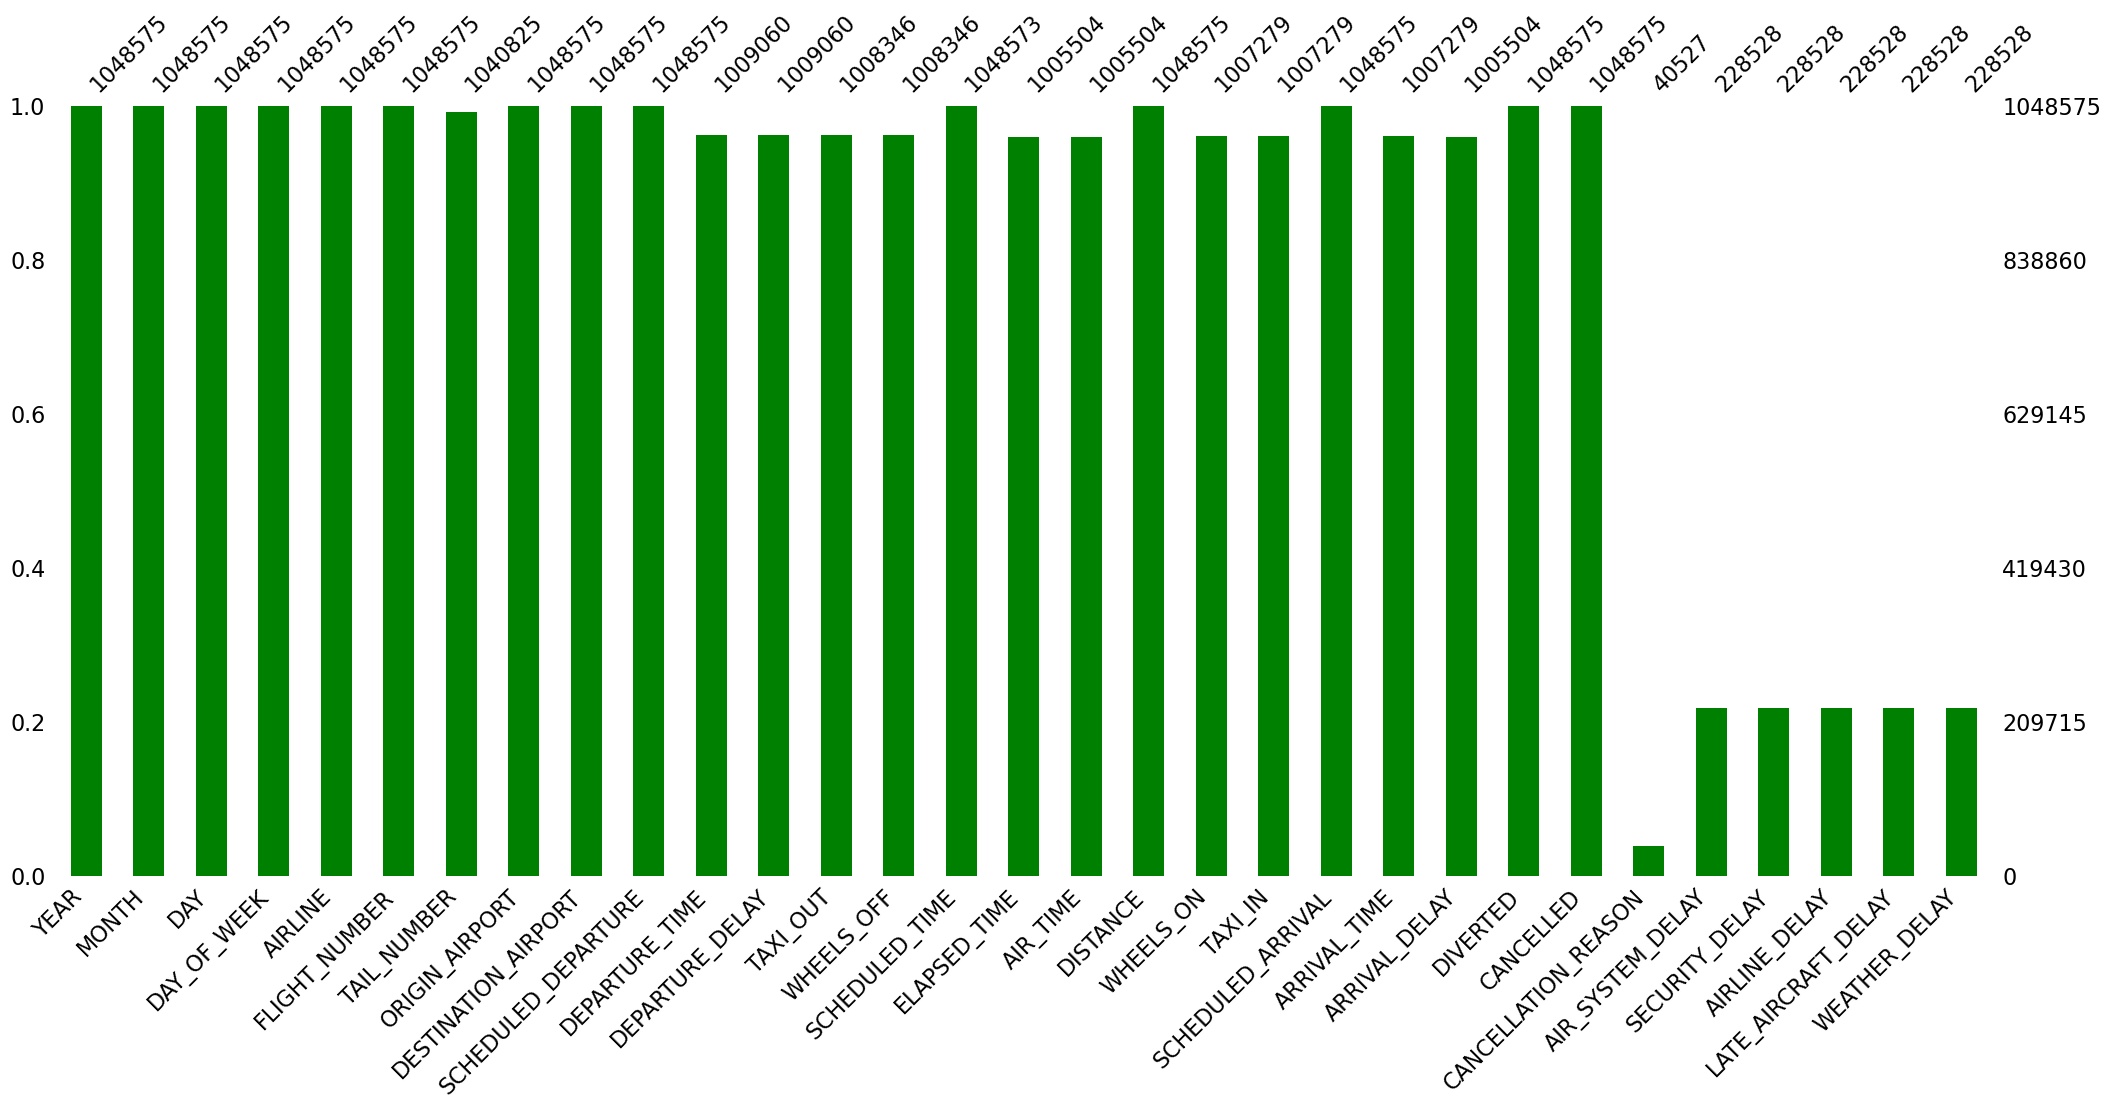

In [11]:
msno.bar(df, color='green')

In [12]:
# Numerical Data Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,1048575.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,1048575.0,1.694297,0.705151,1.0,1.0,2.0,2.0,3.0
DAY,1048575.0,13.820969,8.725656,1.0,6.0,13.0,21.0,31.0
DAY_OF_WEEK,1048575.0,3.953196,1.999436,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,1048575.0,2256.759063,1799.165837,1.0,755.0,1725.0,3485.0,9794.0
SCHEDULED_DEPARTURE,1048575.0,1322.631794,470.774829,1.0,920.0,1319.0,1720.0,2359.0
DEPARTURE_TIME,1009060.0,1333.704944,482.741534,1.0,928.0,1329.0,1731.0,2400.0
DEPARTURE_DELAY,1009060.0,11.334851,39.223721,-61.0,-5.0,-1.0,11.0,1988.0
TAXI_OUT,1008346.0,16.653802,10.070062,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,1008346.0,1357.381529,483.035110,1.0,944.0,1342.0,1745.0,2400.0


**Observation**
- Presence of missing data

In [13]:
# Categorical Data Statistics
df.describe(include=['bool', 'object'])

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
count,1048575,1040825,1048575,1048575,40527
unique,14,4522,315,315,4
top,WN,N477HA,ATL,ATL,B
freq,221586,809,66599,66741,28260


In [14]:
df.duplicated().sum()

0

- No duplicates

In [15]:
# Drop non-impactful columns
df.drop('TAXI_OUT', axis=1, inplace=True)
df.drop('WHEELS_OFF', axis=1, inplace=True)
df.drop('WHEELS_ON', axis=1, inplace=True)
df.drop('TAXI_IN', axis=1, inplace=True)
df.drop('ARRIVAL_DELAY', axis=1, inplace=True)

In [16]:
# Sum delays
df['delay'] = df['AIRLINE_DELAY'] + df['AIR_SYSTEM_DELAY'] + df['DEPARTURE_DELAY'] + df['LATE_AIRCRAFT_DELAY'] + df['SECURITY_DELAY'] + df['WEATHER_DELAY']
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,205.0,194.0,169.0,1448,430,408.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,280.0,279.0,263.0,2330,750,741.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,286.0,293.0,266.0,2296,806,811.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,285.0,281.0,258.0,2342,805,756.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,235.0,215.0,199.0,1448,320,259.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,1013,1005.0,-8.0,96.0,88.0,64.0,416,1149,1133.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,1013,1005.0,-8.0,264.0,270.0,219.0,1416,1337,1335.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,1013,1010.0,-3.0,251.0,257.0,220.0,1723,1624,1627.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,2015,3,10,2,EV,4349,N14158,MSY,ORD,1013,1003.0,-10.0,149.0,146.0,127.0,837,1242,1229.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


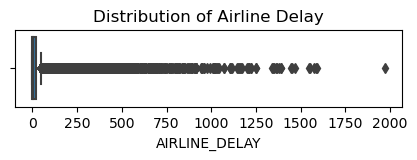

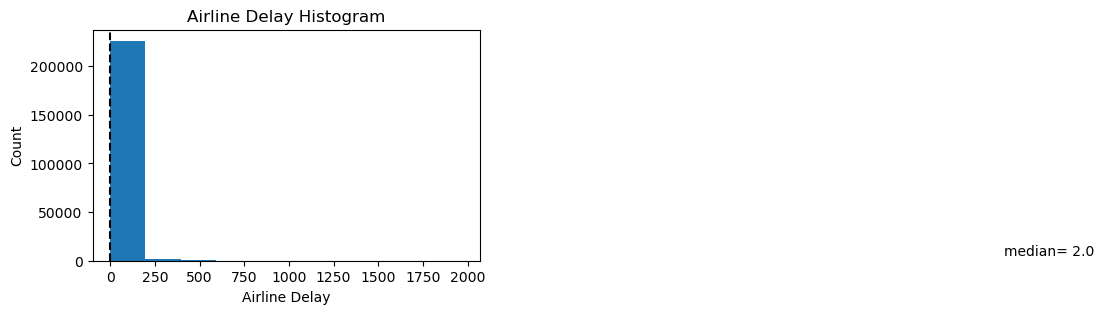

In [17]:
# sns.countplot(x='delay', data=df);
plt.figure(figsize=(5,1))
air_delay = sns.boxplot(data=df, x='AIRLINE_DELAY')
plt.title('Distribution of Airline Delay')
plt.show()

plt.figure(figsize=(5,3))
plt.hist(df['AIRLINE_DELAY'])
plt.xlabel('Airline Delay')
plt.ylabel('Count')
plt.title('Airline Delay Histogram');

median = df['AIRLINE_DELAY'].median()
plt.axvline(median, color='black', linestyle='--')
plt.text(5000, 5000, 'median= ' + str(median), color='black')
plt.show()

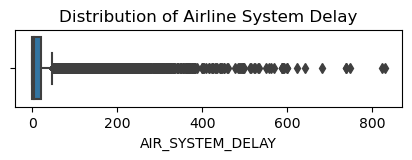

In [18]:
plt.figure(figsize=(5,1))
air_delay = sns.boxplot(data=df, x='AIR_SYSTEM_DELAY')
plt.title('Distribution of Airline System Delay')
plt.show() 

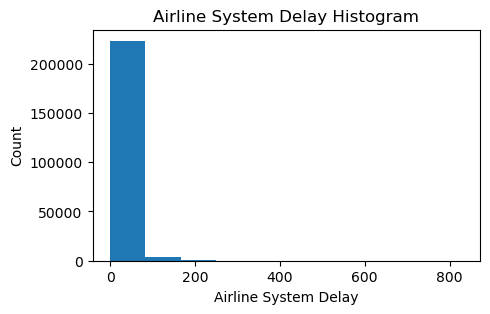

In [19]:
plt.figure(figsize=(5,3))
plt.hist(df['AIR_SYSTEM_DELAY'])
plt.xlabel('Airline System Delay')
plt.ylabel('Count')
plt.title('Airline System Delay Histogram');

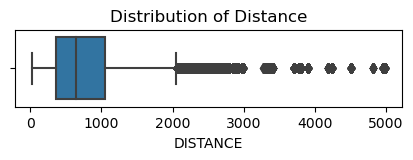

Text(0.5, 1.0, 'Histogram')

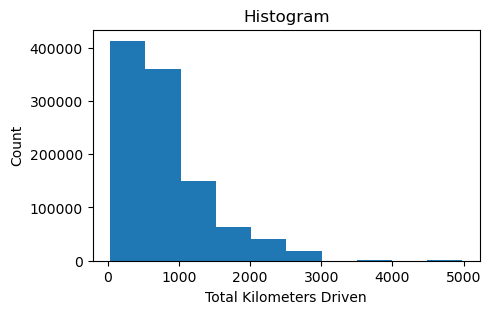

In [20]:
plt.figure(figsize=(5,1))
distance = sns.boxplot(data=df, x='DISTANCE')
plt.title('Distribution of Distance')
plt.show()

plt.figure(figsize=(5,3))
plt.hist(df['DISTANCE'])
plt.xlabel('Total Kilometers Driven')
plt.ylabel('Count')
plt.title('Histogram')

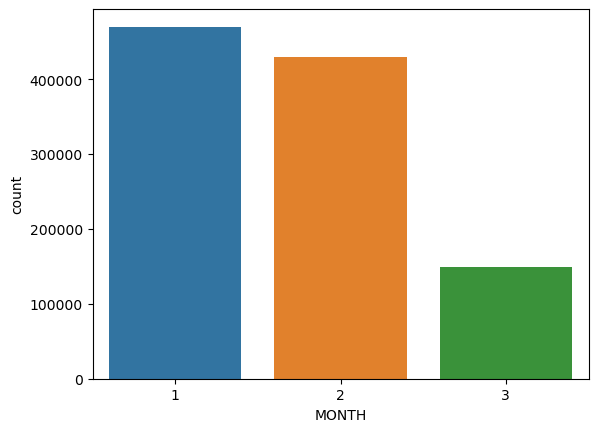

In [21]:
sns.countplot(x='MONTH', data=df);

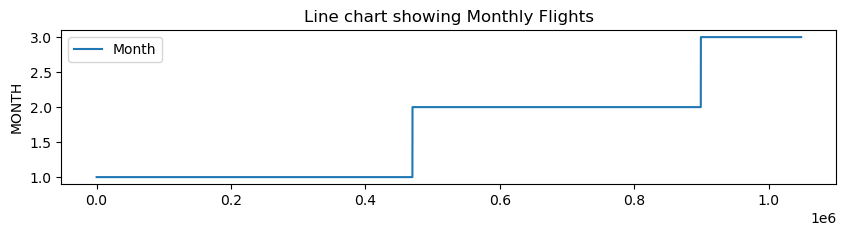

In [31]:
plt.figure(figsize=(10, 2))
sns.lineplot(data=df['MONTH'], label='Month')
plt.title('Line chart showing Monthly Flights')
plt.show()

In [37]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'delay'],
      dtype='object')

In [ ]:
# plt.figure(figsize=(10, 4))
# sns.barplot(x=df.index, y=df['AIRLINE_DELAY'])
# plt.ylabel('Arrival delay (in minutes)')

In [40]:
# Works with numerical values thus encoded should be done.
# sns.heatmap(data=df, annot=True)